In [1]:
import matplotlib.pyplot as plt
import networkx as nx

 # positions for all nodes
payoff = {'000': [0, 0, 0],
 '001': [1, 0, -1],
 '010': [1, 0, -1],
 '011': [2, -1, -1],
 '100': [0, 0, 0],
 '101': [0, 0, 0],
 '110': [-1, 0, 1],
 '111': [0, 0, 0]}
# nodes
def draw_states(payoff):
    #G = nx.cubical_graph()
    G= nx.DiGraph()
    for key in payoff:
        G.add_node(key)
    pos = nx.spring_layout(G) 
    print(pos)
    nx.draw_networkx_nodes(G, pos,
                           #nodelist=[0, 1, 2, 3],
                           node_color='w',
                           node_size=2000,
                           alpha=0.8)
    # some math labels
    labels = {}
    for i, key in enumerate(payoff):
        labels[key] = key+'\n'+str(payoff[key])
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    #for each strategy, check if outgoing improves. If so, add edge
    for i, profile in enumerate(payoff):
        for j, strategy in enumerate(profile):
            deviation = list(profile)
            deviation[j] = str(1-int(strategy))
            deviation = ''.join(deviation)
            if payoff[profile][j]>payoff[deviation][j]:
                print(j, profile, payoff[profile], deviation, payoff[deviation])
                G.add_edge(profile,deviation,player=j)

    cmap = {
        0: 'r',
        1: 'g',
        2: 'b'
    }

    for edge in G.edges():
        player = G[edge[0]][edge[1]]['player']
        print(edge, cmap[player])
        nx.draw_networkx_edges(G, pos,
                           edgelist=[edge],
                               arrows=True,
                           width=12, edge_color=cmap[player])

    print(nx.is_directed_acyclic_graph(G))
    plt.axis('off')
    plt.show()

In [2]:
G['000']['001']['player']

NameError: name 'G' is not defined

2020-05-16 11:01:46,575 - INFO - <class 'corpgame.PolymatrixGame'>.__init__() players indexed [0, 1, 2]
{'000': array([-0.177795  ,  0.96756182]), '001': array([-0.93802665, -0.06736022]), '010': array([0.5670644, 0.7408966]), '011': array([ 0.72426059, -0.57833548]), '100': array([-0.6670621 ,  0.53858239]), '101': array([-0.59647744, -0.84754604]), '110': array([1.        , 0.15883288]), '111': array([ 0.0880362 , -0.91263195])}
True


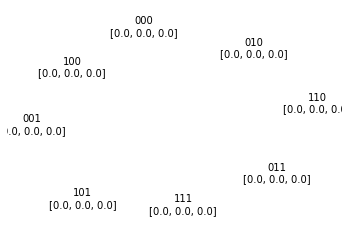

In [8]:
from corpgame import PolymatrixGame
game = PolymatrixGame(start_populations_matrix = [[3, 0], [1, 2], [2, 2]])
game.solve()
draw_states(game.payoffs)

In [13]:
game.actions

{'000': {'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
  'payoff': [0.0, 0.0, 0.0],
  'pure_nash': True},
 '001': {'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
  'payoff': [0.0, 0.0, 0.0],
  'pure_nash': True},
 '010': {'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
  'payoff': [0.0, 0.0, 0.0],
  'pure_nash': True},
 '011': {'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
  'payoff': [0.0, 0.0, 0.0],
  'pure_nash': True},
 '100': {'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
  'payoff': [0.0, 0.0, 0.0],
  'pure_nash': True},
 '101': {'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
  'payoff': [0.0, 0.0, 0.0],
  'pure_nash': True},
 '110': {'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
  'payoff': [0.0, 0.0, 0.0],
  'pure_nash': True},
 '111': {'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
  'payoff': [0.0, 0.0, 0.0],
  'pure_nash': True}}

In [8]:
import pandas as pd
import numpy as np
import math, random, pickle

from corpgame import Game
# create a simple mobility game
n = 13
all_nash = []
for n in range(15,17):
    n_nash = []
    for i in range(1,int(2**(n**0.47))):
        s = []
        for j in range(0,n):
            a = [random.randint(0,11), random.randint(0,10)]
            s.append(a)
        game = Game()
        # show nash equilibria for starting conditions
        game(state=s)
        game.get_nash()
        num_nash = 0
        for key in game.nash:
            if game.nash[key]: num_nash+=1
        n_nash.append(num_nash)
        if i%5==0:
            print(i, s)
            game.print()
            game.show_nash()
        if game.nash=={}:
            print(i, "NO NASH!!!!!!!!!!!!!!!!!!!!")
            print(s)
            game.print()
            break
    all_nash.append(n_nash)
    print("Size ", n, num_nash)
    pickle.dump(all_nash, open('nash_4.pickle','wb'))

Size  1 2
Size  2 4
Size  3 6
5 [[7, 4], [3, 1], [7, 6], [4, 7]]
Player  0 [7, 4]  score  11
Player  1 [3, 1]  score  4
Player  2 [7, 6]  score  13
Player  3 [4, 7]  score  11
Nash: 0000  with payoff  [0, 0, 0, 0]
Nash: 0001  with payoff  [0, 0, 0, 0]
Nash: 0010  with payoff  [0, 0, 0, 0]
Nash: 0100  with payoff  [0, 0, 0, 0]
Nash: 0101  with payoff  [0, 0, 0, 0]
Nash: 0110  with payoff  [0, 0, 0, 0]
Nash: 1000  with payoff  [0, 0, 0, 0]
Nash: 1100  with payoff  [0, 0, 0, 0]
Size  4 8
5 [[5, 3], [5, 8], [11, 9], [6, 5], [10, 1]]
Player  0 [5, 3]  score  8
Player  1 [5, 8]  score  13
Player  2 [11, 9]  score  20
Player  3 [6, 5]  score  11
Player  4 [10, 1]  score  11
Nash: 00000  with payoff  [0, 0, 0, 0, 0]
Nash: 00001  with payoff  [0, 0, 0, 0, 0]
Nash: 00010  with payoff  [0, 0, 0, 0, 0]
Nash: 00011  with payoff  [0, 0, 0, 0, 0]
Nash: 00100  with payoff  [0, 0, 0, 0, 0]
Nash: 00101  with payoff  [0, 0, 0, 0, 0]
Nash: 01000  with payoff  [0, 0, 0, 0, 0]
Nash: 01001  with payoff  [0, 

KeyboardInterrupt: 

In [38]:
import pickle
nash = pickle.load(open('nash_4.pickle','rb'))
for i,n in enumerate(nash):
    print(i+2, sum(n)/len(n), '\t\t',nash[i])

2 2.3 		 [2, 3, 1, 4, 5, 2, 1, 2, 1, 2]
3 2.8181818181818183 		 [2, 3, 7, 4, 5, 3, 2, 1, 2, 1, 1]


In [11]:
import random
l = []
i=3
for j in range(0,i):
    a = [random.randint(0,10), random.randint(0,10)]
    l.append(a)
l

[[10, 2], [9, 2], [10, 9]]

In [8]:
type(l)

NoneType